### Es cierto, una diferencia en los accidentes automovilisticos de Monterrey y las demás ciudades de México. 

Veamos si es cierto que hay un mayo número de accidentes en Monterrey que en otra ciudad.

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4)
from random import sample
import geopandas

In [2]:
# cargamos los datos historicos
accidentes_mexico = pd.read_csv("../data/processed/atus_anual_1997_2019.csv", index_col=False)
accidentes_mexico["diasemana"] = accidentes_mexico["diasemana"].replace({"lunes":"Lunes"})
accidentes_mexico.head(3)

,id_entidad,id_municipio,anio,mes,id_hora,id_minuto,id_dia,diasemana,tipaccid,causaacci,caparod,sexo,aliento,cinturon,id_edad,clasacc,nom_entidad,nom_municipio
0,1,1.0,2017,1,18,30,11,Miercoles,Colision con vehiculo automotor,Conductor,Pavimentada,Hombre,No,Se ignora,30.0,Sólo daños,Aguascalientes,Aguascalientes
1,1,1.0,2017,1,1,50,9,Lunes,Colision con motocicleta,Conductor,Pavimentada,Hombre,No,Se ignora,30.0,No fatal,Aguascalientes,Aguascalientes
2,1,1.0,2017,1,8,30,12,Jueves,Colision con objeto fijo,Conductor,Pavimentada,Hombre,No,Se ignora,22.0,No fatal,Aguascalientes,Aguascalientes


In [3]:
accidentes_mexico.causaacci.unique()

array(['Conductor', 'Peaton o pasajero', 'Falla del vehiculo',
       'Mala condicion del camino', 'Otra', 'Certificado cero'],
      dtype=object)

In [4]:
accidentes_mexico.tipaccid.unique()

array(['Colision con vehiculo automotor', 'Colision con motocicleta',
       'Colision con objeto fijo',
       'Colision con peaton (atropellamiento)', 'Colision con ciclista',
       'Colision con ferrocarril', 'Salida del camino',
       'Caida de pasajero', 'Colision con animal', 'Volcadura', 'Otro',
       'Incendio', 'Certificado cero'], dtype=object)

In [5]:
accidentes_mexico.aliento.unique()

array(['No', 'Se ignora', 'Si', 'Certificado cero', 'No especificado'],
      dtype=object)

In [6]:
accidentes_mexico.clasacc.unique()

array(['Sólo daños', 'No fatal', 'Fatal', 'Certificado cero'],
      dtype=object)

In [7]:
entidad = accidentes_mexico.groupby("nom_entidad").id_entidad.count().reset_index().sort_values("id_entidad", ascending=False)
entidad.head()

,nom_entidad,id_entidad
18,Nuevo Leon,1628258
13,Jalisco,971136
5,Chihuahua,822503
27,Tamaulipas,407238
10,Guanajuato,403688


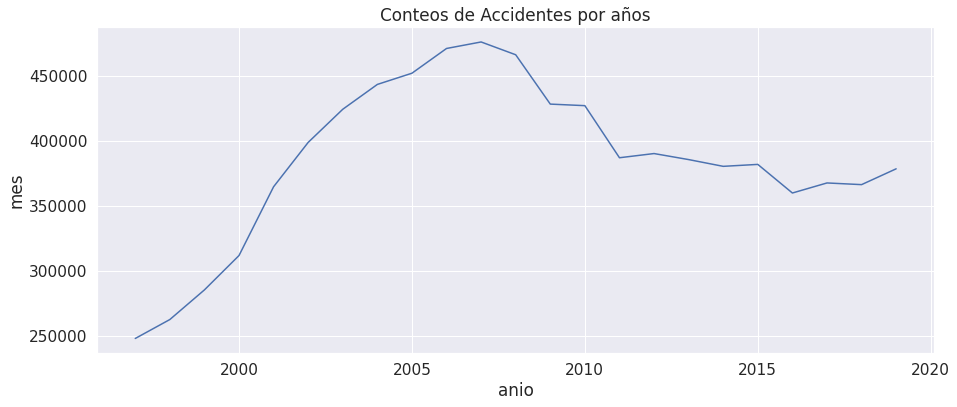

In [8]:
# graficamos el numero total de accidentes por años.
plt.rcParams['figure.figsize'] = (15, 6)
sns.lineplot(data=accidentes_mexico.groupby(["anio"], as_index=False).mes.count(),
             x="anio", y="mes")
plt.title("Conteos de Accidentes por años")
plt.show()

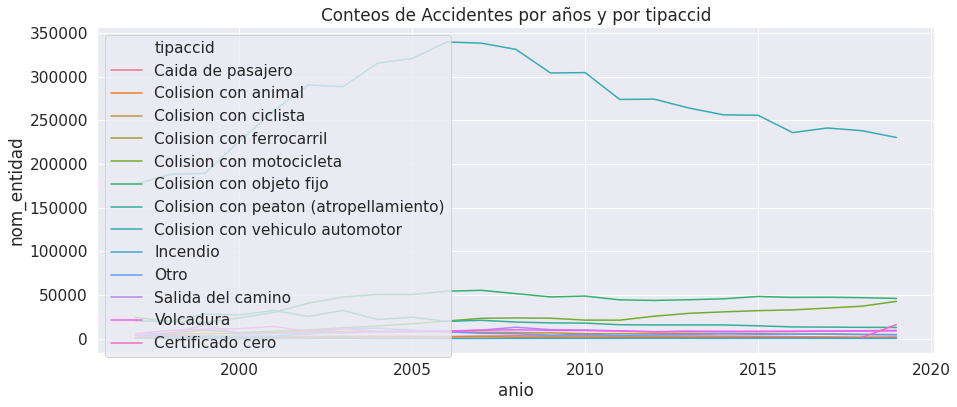

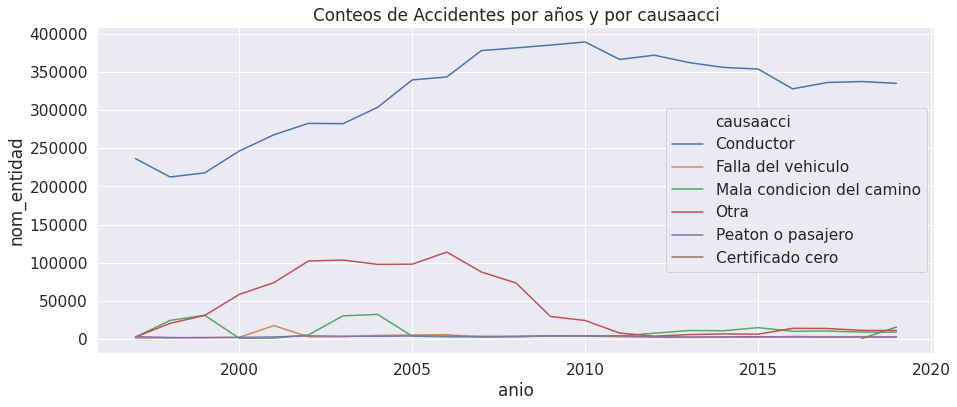

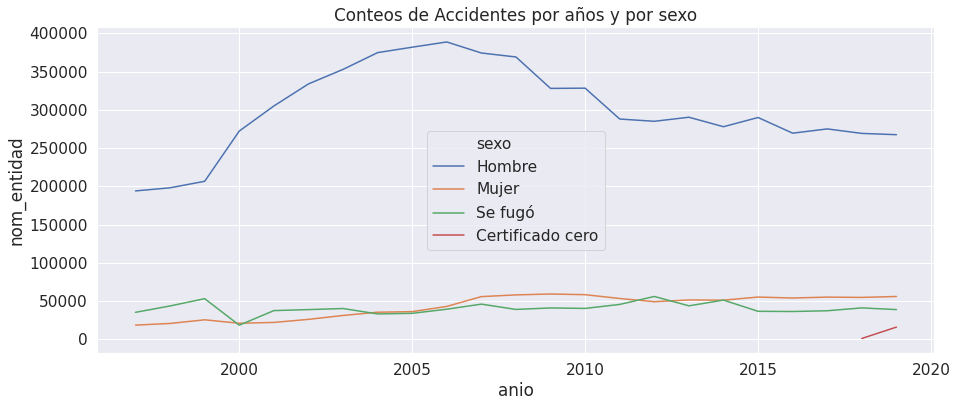

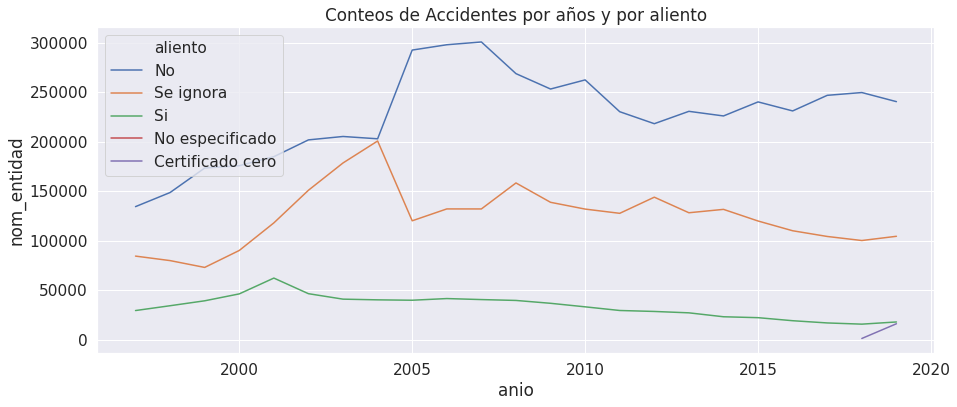

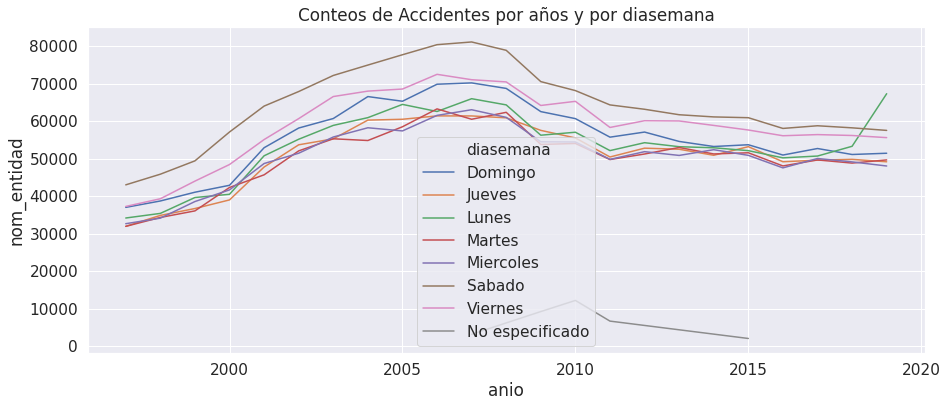

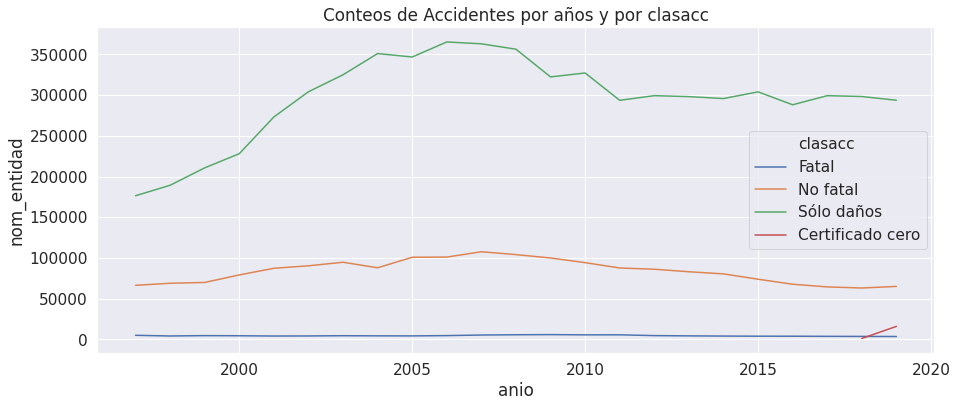

In [9]:
col_impor = ["tipaccid", "causaacci", "sexo", "aliento", "diasemana", "clasacc"]
for i in col_impor:
    # graficamos el numero total de accidentes por años.
    plt.rcParams['figure.figsize'] = (15, 6)
    sns.lineplot(data=accidentes_mexico.groupby(["anio", i], as_index=False).nom_entidad.count(),
                 x="anio", y="nom_entidad", hue=i)
    plt.title("Conteos de Accidentes por años y por"+" "+i)
    plt.show()

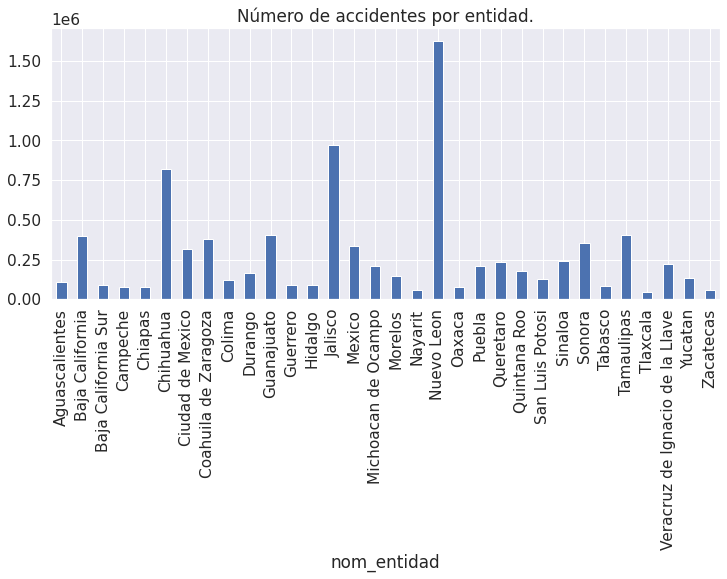

In [10]:
# comparamos los totales por años.
accidentes_mexico.groupby("nom_entidad").id_entidad.count().plot(kind='bar', figsize=(12, 5), rot=0)
plt.xticks(rotation=90)
plt.title("Número de accidentes por entidad.")
plt.show()

Observamos claramente que el estado Nuevo León es el que tiene más accidentes registrados en México. Pero, ¿siempre ha sido asi? Analicemos más a fondo este hecho.

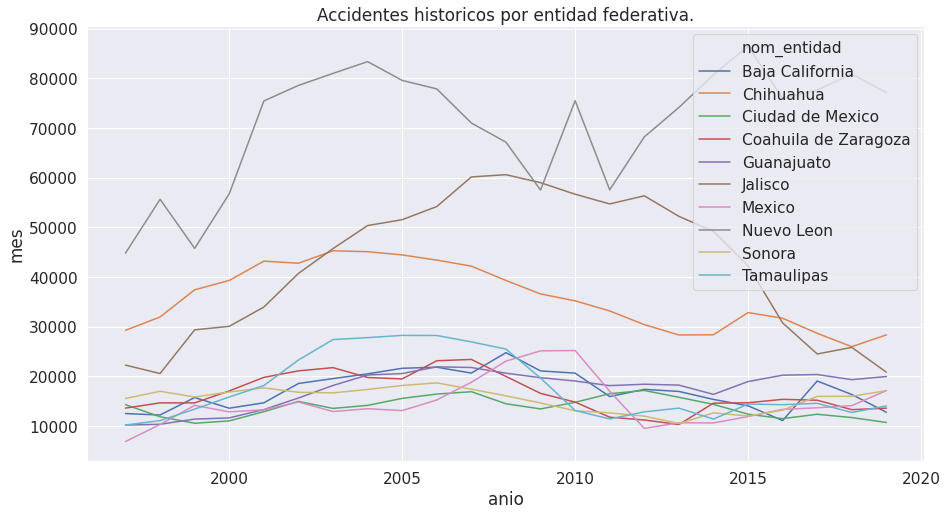

In [11]:
accidentes_anual_estatal_mexico = accidentes_mexico.groupby(["nom_entidad","anio"], as_index=False).mes.count()

plt.rcParams['figure.figsize'] = (15, 8)
sns.lineplot(data=accidentes_anual_estatal_mexico[accidentes_anual_estatal_mexico.nom_entidad.isin(entidad["nom_entidad"].tolist()[0:10])],
             x="anio", y="mes", hue="nom_entidad")
plt.title("Accidentes historicos por entidad federativa.")
plt.show()

In [12]:
mex=geopandas.read_file("../data/processed/mexican_states.geojson")
mex["admin_name"] = mex.admin_name.replace({'Distrito Federal':"Ciudad de Mexico"})
mex = mex.rename(columns={"admin_name":"nom_entidad"})
mex["nom_entidad"] = mex["nom_entidad"].replace({"Coahuila":"Coahuila de Zaragoza",
                                                 "Michoacan":"Michoacan de Ocampo",
                                                 "Veracruz":'Veracruz de Ignacio de la Llave'})

In [13]:
import folium
from folium.plugins import MarkerCluster 
mapa_accidentes_mexico = folium.Map(location=(25, -100), zoom_start=5)

prueba_2020 = accidentes_anual_estatal_mexico[accidentes_anual_estatal_mexico.anio==2000]
prueba_2020.head(2)

mapa_accidentes_mexico.choropleth(geo_data=mex,
             data=prueba_2020, 
             columns=['nom_entidad', "mes"], 
             key_on='feature.properties.nom_entidad', 
             fill_color='Reds', fill_opacity=0.7, line_opacity=0.3,
             legend_name='Total de accidentes')
mapa_accidentes_mexico

/home/enrique/anaconda3/lib/python3.8/site-packages/folium/folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


Claramente se observa que Monterrey simpre ha sido lider en el número total de accidentes automovilisticos. 
Algo curioso es lo que sucede en el estado de Jalisco, a principios del milenio los accidentes totales anuales se ve un crecimiento en estos. Pero a partir del año 2007 se observa una decrecimiento de los accidentes, 
- ¿A qué se debe este control de accidentes?
- ¿El gobierno jaliscience tomo medidas preventivas?
- ¿Hay algún factor que explique este cambio? 

Ampliemos un poco más el analisis no concluyamos tan rápido que Nuevo León tiene un problema con los accidentes automovilisticos, ya que si no controlamos por el número de habitantes o el número de coches registrados por estado. Esto es obvio ya que si existe una mayor población en un estado puede que implique que existan más automoviles y por ende más accidentes, es por esto que realizemos una analisis más a fondo primeros considerando lo que representan estos accidentes para el total de automoviles registrados en los estados 

## Vehiculos registrados por estados

In [14]:
# cargamos los datos y sumamos el número total de vehiculos.
vehiculos_registrados = pd.read_csv("../data/processed/vehiculos_anual_1997_2019.csv", index_col=False)
vehiculos_registrados["total_vehiculos"] = vehiculos_registrados[vehiculos_registrados.columns.to_list()[3:15]].apply(lambda x: x.sum(), axis=1) 

In [15]:
# total de vehiculos por año-estado.
vehiculos_anual_estatal_registrados = vehiculos_registrados.groupby(["anio", "nom_entidad"], as_index=False).total_vehiculos.sum()
vehiculos_anual_estatal_registrados[vehiculos_anual_estatal_registrados.anio==2019].sort_values("total_vehiculos", ascending=False).head()

,anio,nom_entidad,total_vehiculos
718,2019,Mexico,8455028
710,2019,Ciudad de Mexico,6084903
717,2019,Jalisco,3910903
719,2019,Michoacan de Ocampo,2741629
722,2019,Nuevo Leon,2385644


Text(0.5, 1.0, 'Total de vehiculos en circulación por entidad federativa.')

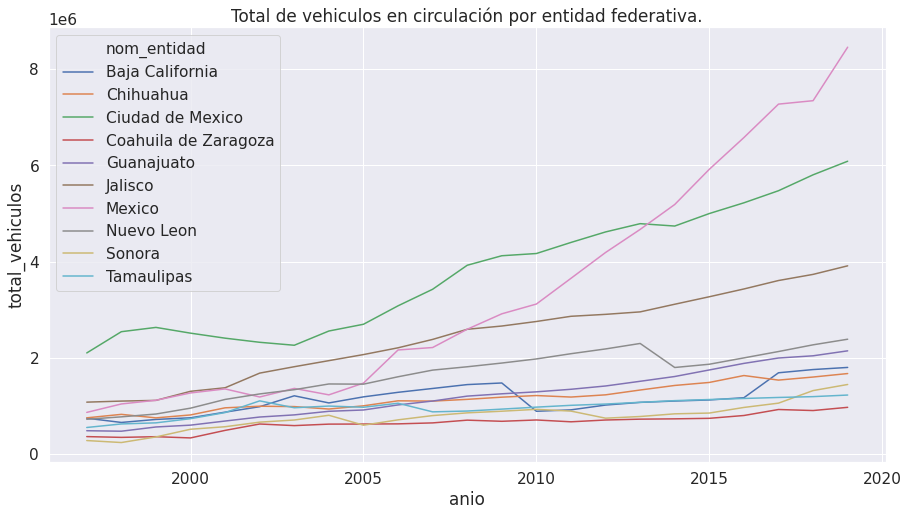

In [16]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.lineplot(data=vehiculos_anual_estatal_registrados[vehiculos_anual_estatal_registrados.nom_entidad.isin(entidad["nom_entidad"].tolist()[0:10])],
             x="anio", y="total_vehiculos", hue="nom_entidad")
plt.title("Total de vehiculos en circulación por entidad federativa.")

La gráfica anterior representa el número de automoviles registrados anuales en cada uno de los estados (en la gráfica solo se muestran el top 7). Es claro que el estado de México y la Ciudad de México son los que tienen más autos registrados en los últimos años. Monterrey se encuentra en la posición 5 con más vehiculos registrados.

In [17]:
accidentes_mexico_vehiculos_registrados = pd.merge(accidentes_anual_estatal_mexico,
         vehiculos_anual_estatal_registrados[["anio", "nom_entidad","total_vehiculos"]], 
         on=["anio", "nom_entidad"], how="left")

accidentes_mexico_vehiculos_registrados["porcen_accidentes"] = accidentes_mexico_vehiculos_registrados["mes"]/accidentes_mexico_vehiculos_registrados["total_vehiculos"]*100

In [18]:
accidentes_mexico_vehiculos_registrados.head()

,nom_entidad,anio,mes,total_vehiculos,porcen_accidentes
0,Aguascalientes,1997,3864,159839,2.417433
1,Aguascalientes,1998,3863,171667,2.250287
2,Aguascalientes,1999,4263,176712,2.412400
3,Aguascalientes,2000,4967,198046,2.508003
4,Aguascalientes,2001,4965,226097,2.195960


Text(0.5, 1.0, 'Porcentaje de accidentes historicos por entidad federativa.')

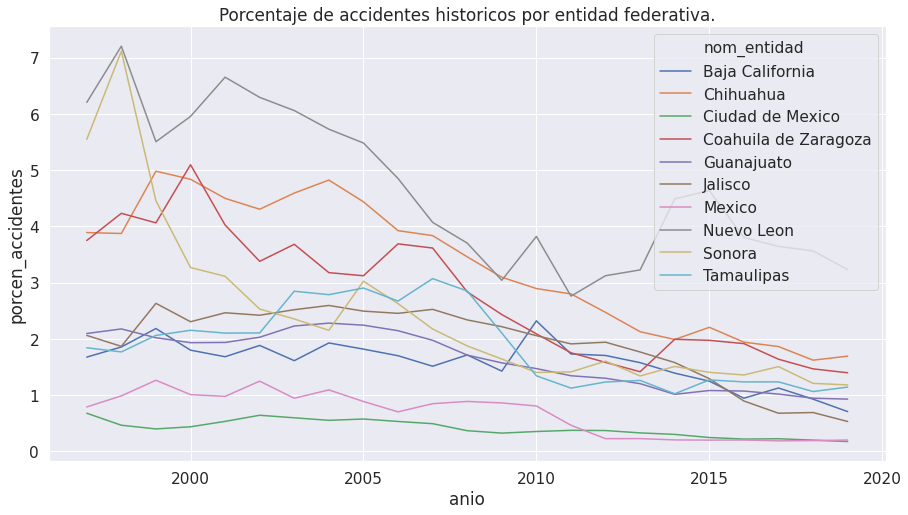

In [19]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.lineplot(data=accidentes_mexico_vehiculos_registrados[accidentes_mexico_vehiculos_registrados.nom_entidad.isin(entidad["nom_entidad"].tolist()[0:10])],
             x="anio", y="porcen_accidentes", hue="nom_entidad")
plt.title("Porcentaje de accidentes historicos por entidad federativa.")

In [20]:
mapa_accidentes_mexico = folium.Map(location=(25, -100), zoom_start=5)

prueba_2020 = accidentes_mexico_vehiculos_registrados[accidentes_mexico_vehiculos_registrados.anio==2000]
prueba_2020.head(2)

mapa_accidentes_mexico.choropleth(geo_data=mex,
             data=prueba_2020, 
             columns=['nom_entidad', "porcen_accidentes"], 
             key_on='feature.properties.nom_entidad', 
             fill_color='Reds', fill_opacity=0.7, line_opacity=0.3,
             legend_name='Porcentaje de accidentes')
mapa_accidentes_mexico

/home/enrique/anaconda3/lib/python3.8/site-packages/folium/folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


La gráfica anterior nos muestra como Nuevo León sigue siendo el que tiene el mayor porcentaje de accidentes con respecto al número de automoviles que tienen registrados. Y efectivamente existe una diferencia contra los demás estados. 
- ¿A qué se deberá esta diferencia de accidentes?
- ¿Existe un factor que influya? Por ejemplo, el consumo de alcohol de los habitantes.
- ¿Qué tipo de accidentes son los más comunes en Nuevo León?

Otro enfoque a considerar es controlando por el número de personas en cada estado, ya que si solo consideramos el número de automoviles registrados puede existir un sesgo en el analisis ya que puede que exista un mayor número de automoviles pero no sabemos si estos son... Es decir, tenemos que controlar por el número de personas por automoviles que existen en cada estado.

Analisaremos más a fondo los accidentes de Nuevo León. 

### Analisis profundo para el estado de Nuevo León.
Hay muchos aspectos a analizar, 
1. Qué día de a semana hay más acidentes? 
2. Existe un porcentaje involucran a personas con aliento alcolico? Qué porcentaje accidentes por hombres hay? Qué municipios presentan el mayor número de accidentes? Cuáles son los tipos de accidentes más usuales en monterrey? 

In [21]:
accidentes_nl = accidentes_mexico[accidentes_mexico.nom_entidad=="Nuevo Leon"]
accidentes_nl.head(2)

,id_entidad,id_municipio,anio,mes,id_hora,id_minuto,id_dia,diasemana,tipaccid,causaacci,caparod,sexo,aliento,cinturon,id_edad,clasacc,nom_entidad,nom_municipio
190647,19,4.0,2017,1,9,10,28,Sabado,Colision con vehiculo automotor,Otra,Pavimentada,Hombre,No,Se ignora,27.0,Sólo daños,Nuevo Leon,Allende
190648,19,4.0,2017,1,2,20,27,Viernes,Colision con vehiculo automotor,Conductor,Pavimentada,Mujer,No,Se ignora,45.0,Sólo daños,Nuevo Leon,Allende


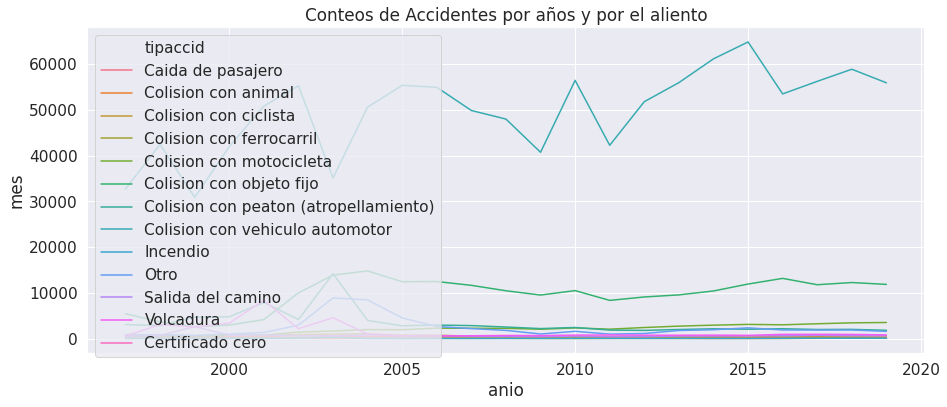

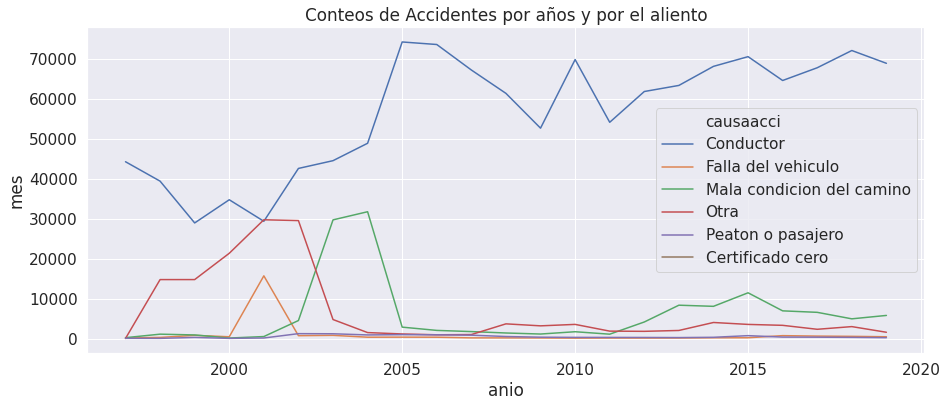

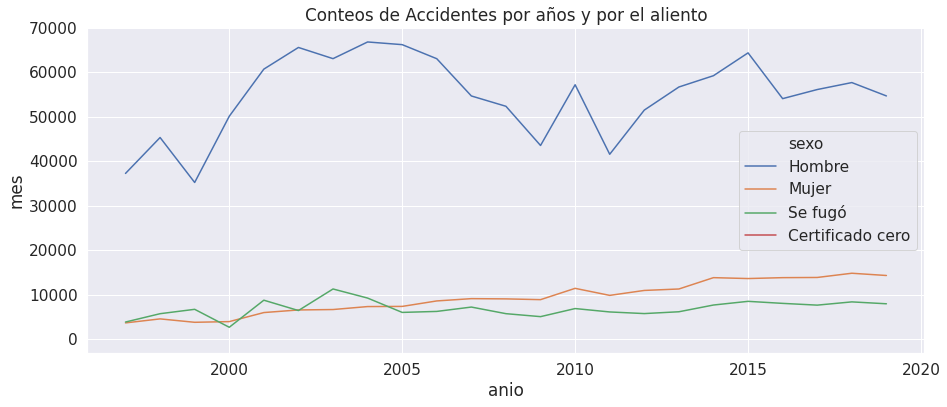

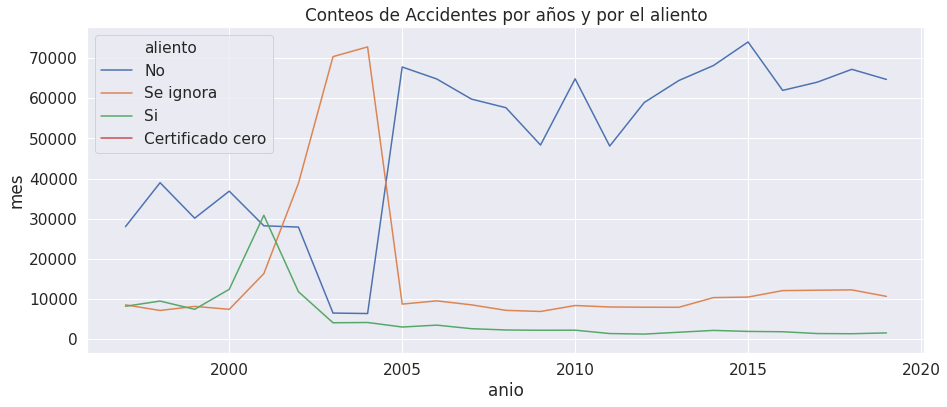

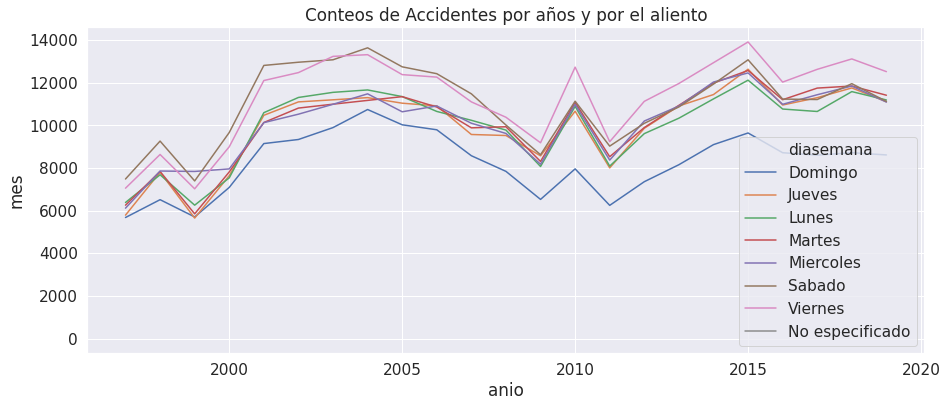

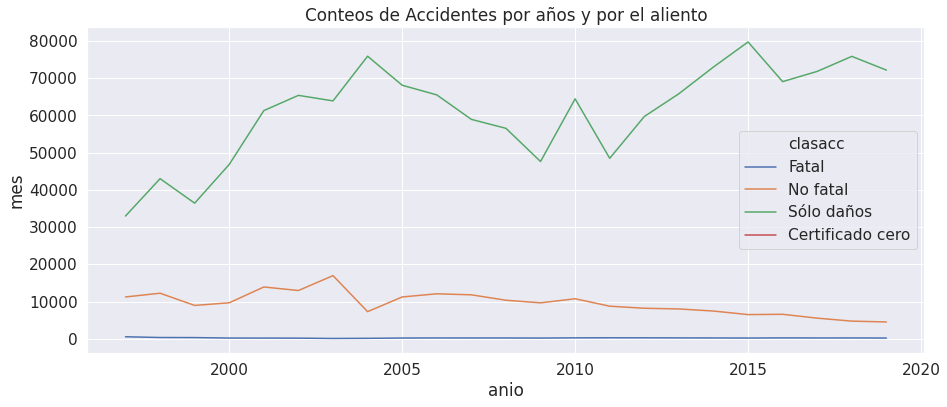

In [22]:
col_impor = ["tipaccid", "causaacci", "sexo", "aliento", "diasemana", "clasacc"]
for i in col_impor:
# graficamos por cada una de las columnas en col_impor.
    plt.rcParams['figure.figsize'] = (15, 6)
    sns.lineplot(data=accidentes_nl.groupby(["anio", i], as_index=False).mes.count(),
                 x="anio", y="mes", hue=i)
    plt.title("Conteos de Accidentes por años y por el aliento")
    plt.show()

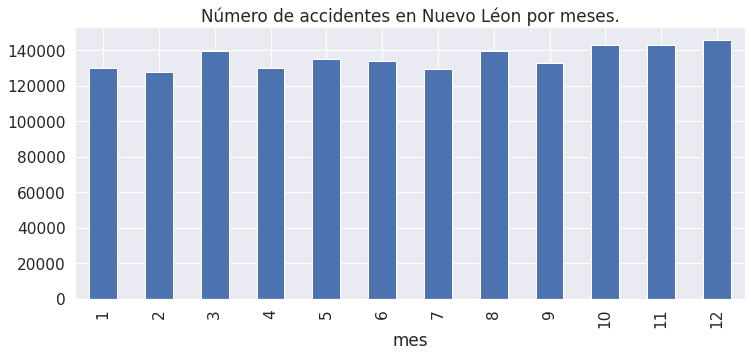

Text(0.5, 1.0, 'Número de accidentes en Nuevo Léon por meses.')

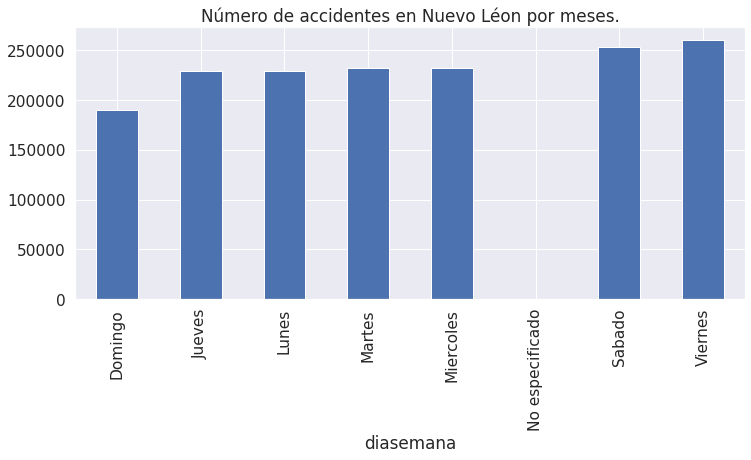

In [23]:
# comparamos los totales por años.
accidentes_nl.groupby(["mes"]).id_entidad.count().plot(kind='bar', figsize=(12, 5), rot=0)
plt.xticks(rotation=90)
plt.title("Número de accidentes en Nuevo Léon por meses.")
plt.show()

# comparamos los totales por años.
accidentes_nl.groupby(["diasemana"]).id_entidad.count().plot(kind='bar', figsize=(12, 5), rot=0)
plt.xticks(rotation=90)
plt.title("Número de accidentes en Nuevo Léon por meses.")

# Visualización de los datos de clima